### 1. Gi·ªõi thi·ªáu v·ªÅ g·ªôp nh√≥m (Grouping) v√† th·ªëng k√™ d√πng crosstab trong Pandas  

Pandas cung c·∫•p c√°c ph∆∞∆°ng th·ª©c m·∫°nh m·∫Ω ƒë·ªÉ th·ª±c hi·ªán c√°c ph√©p g·ªôp nh√≥m (grouping) v√† th·ªëng k√™ (aggregation) nh·∫±m ph√¢n t√≠ch v√† x·ª≠ l√Ω d·ªØ li·ªáu theo nh√≥m.  

C√¥ng th·ª©c chung c·ªßa groupby() trong Pandas nh∆∞ sau:  

**df.groupby(by)[column].agg(func)**  
Trong ƒë√≥:  

* df: DataFrame c·∫ßn g·ªôp nh√≥m.  
* by: T√™n c·ªôt ho·∫∑c danh s√°ch c√°c c·ªôt d√πng ƒë·ªÉ nh√≥m d·ªØ li·ªáu.  
* column (tu·ª≥ ch·ªçn): C·ªôt c·∫ßn th·ª±c hi·ªán ph√©p to√°n th·ªëng k√™. N·∫øu kh√¥ng ch·ªâ ƒë·ªãnh, to√†n b·ªô DataFrame s·∫Ω ƒë∆∞·ª£c g·ªôp nh√≥m.  
* agg(func) (tu·ª≥ ch·ªçn): √Åp d·ª•ng m·ªôt ho·∫∑c nhi·ªÅu ph√©p to√°n th·ªëng k√™ l√™n nh√≥m.  


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cho b·ªô d·ªØ li·ªáu v·ªÅ xe h∆°i v·ªõi c√°c th√¥ng tin li√™n quan:
# c√≥ 206 h√†ng v√† 26 c·ªôt, v·ªõi c√°c th√¥ng tin li√™n quan ƒë·∫øn xe h∆°i nh∆∞ sau :
# symboling: ƒêi·ªÉm s·ªë r·ªßi ro c·ªßa xe.
# normalized-losses: T·ªïn th·∫•t chu·∫©n h√≥a (c√≥ nhi·ªÅu gi√° tr·ªã b·ªã thi·∫øu, ƒë∆∞·ª£c k√Ω hi·ªáu b·∫±ng '?').
# make: Nh√£n hi·ªáu xe.
# fuel-type: Lo·∫°i nhi√™n li·ªáu (gas, diesel).
# aspiration: Ki·ªÉu n·∫°p kh√≠ (std, turbo).
# num-of-doors: S·ªë c·ª≠a (two, four).
# body-style: Ki·ªÉu d√°ng th√¢n xe (convertible, sedan, hatchback, v.v.).
# drive-wheels: H·ªá d·∫´n ƒë·ªông (fwd, rwd, 4wd).
# engine-location: V·ªã tr√≠ ƒë·ªông c∆° (front, rear).
# wheel-base: Chi·ªÅu d√†i c∆° s·ªü.
# length, width, height: K√≠ch th∆∞·ªõc c·ªßa xe.
# curb-weight: Tr·ªçng l∆∞·ª£ng xe.
# engine-type: Lo·∫°i ƒë·ªông c∆°.
# num-of-cylinders: S·ªë xy-lanh.
# engine-size: Dung t√≠ch ƒë·ªông c∆°.
# fuel-system: H·ªá th·ªëng nhi√™n li·ªáu.
# bore, stroke: C√°c th√¥ng s·ªë li√™n quan ƒë·∫øn xy-lanh.
# compression-ratio: T·ª∑ l·ªá n√©n.
# horsepower: C√¥ng su·∫•t ƒë·ªông c∆°.
# peak-rpm: T·ªëc ƒë·ªô v√≤ng quay t·ªëi ƒëa.
# city-mpg, highway-mpg: M·ª©c ti√™u th·ª• nhi√™n li·ªáu trong th√†nh ph·ªë v√† tr√™n xa l·ªô.
# price: Gi√° b√°n c·ªßa xe.


In [2]:
# ƒê·ªçc d·ªØ li·ªáu 
cars = pd.read_csv('data_bai_7/auto.csv')

# D√πng .head() ho·∫∑c .tail() ƒë·ªÉ xem tr∆∞·ªõc d·ªØ5 d√≤ng li·ªáu:
cars.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

### Tr∆∞·ªõc khi th·ª©c hi·ªán c√°c ph√©p t√≠nh to√°n th·ªëng k√™ c≈©ng nh∆∞ g·ªôp nh√≥m.... ta ph·∫£i x·ª≠ l√Ω, l√†m s·∫°ch d·ªØ li·ªáu tr∆∞·ªõc   

### 1. L√†m s·∫°ch d·ªØ li·ªáu  
L√†m s·∫°ch d·ªØ li·ªáu l√† m·ªôt b∆∞·ªõc quan tr·ªçng trong x·ª≠ l√Ω d·ªØ li·ªáu, gi√∫p ƒë·∫£m b·∫£o d·ªØ li·ªáu kh√¥ng c√≥ gi√° tr·ªã sai, thi·∫øu ho·∫∑c d∆∞ th·ª´a tr∆∞·ªõc khi th·ª±c hi·ªán ph√¢n t√≠ch.   
Pandas cung c·∫•p nhi·ªÅu c√¥ng c·ª• m·∫°nh m·∫Ω ƒë·ªÉ l√†m s·∫°ch d·ªØ li·ªáu m·ªôt c√°ch hi·ªáu qu·∫£.  

#### a. Ki·ªÉm tra d·ªØ li·ªáu  
Tr∆∞·ªõc khi l√†m s·∫°ch d·ªØ li·ªáu, c·∫ßn ki·ªÉm tra xem d·ªØ li·ªáu c√≥ v·∫•n ƒë·ªÅ g√¨ kh√¥ng. M·ªôt s·ªë ph∆∞∆°ng ph√°p ki·ªÉm tra ph·ªï bi·∫øn:


In [3]:
# Xem t·ªïng quan d·ªØ li·ªáu
# D√πng .info() ƒë·ªÉ ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu v√† s·ªë l∆∞·ª£ng gi√° tr·ªã thi·∫øu.

#  normalized-losses  206 non-null    object ==> Nh∆∞ng c√≥ gi√° tr·ªã b·ªã thi·∫øu l√†  ? ·ªü nhi·ªÅu c·ªôt nh∆∞ num-of-doors , price ....
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          206 non-null    int64  
 1   normalized-losses  206 non-null    object 
 2   make               206 non-null    object 
 3   fuel-type          206 non-null    object 
 4   aspiration         206 non-null    object 
 5   num-of-doors       206 non-null    object 
 6   body-style         206 non-null    object 
 7   drive-wheels       206 non-null    object 
 8   engine-location    206 non-null    object 
 9   wheel-base         206 non-null    float64
 10  length             206 non-null    float64
 11  width              206 non-null    float64
 12  height             206 non-null    float64
 13  curb-weight        206 non-null    int64  
 14  engine-type        206 non-null    object 
 15  num-of-cylinders   206 non-null    object 
 16  engine-size        206 non

In [4]:
# D√πng .describe() ƒë·ªÉ xem c√°c th·ªëng k√™ t·ªïng qu√°t (√°p d·ª•ng cho d·ªØ li·ªáu s·ªë). 
cars.describe() 


symboling  wheel-base      length       width      height  \
count  206.000000  206.000000  206.000000  206.000000  206.000000   
mean     0.844660   98.776699  174.095146   65.916505   53.716505   
std      1.251398    6.014003   12.324763    2.143605    2.440516   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.425000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.400000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   206.000000   206.000000         206.000000  206.000000   206.000000  
mean   2557.606796   127.121359          10.138447   25.194175    30.718447  
std     520.234062    41.654442           3.962775    6.536290     6.885712  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2151.000000    97.250000           8.600000   19.000000    25.000000  
50%    2417.000000   120.000000           9.000000   24.000000    30.000000  
75%    2947.750000   144.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

In [5]:
cars.applymap(lambda x: '?' in str(x))

symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0        False               True  False      False       False         False   
1        False               True  False      False       False         False   
2        False               True  False      False       False         False   
3        False              False  False      False       False         False   
4        False              False  False      False       False         False   
..         ...                ...    ...        ...         ...           ...   
201      False              False  False      False       False         False   
202      False              False  False      False       False         False   
203      False              False  False      False       False         False   
204      False              False  False      False       False         False   
205      False              False  False      False       False         False   

     body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0         False         False            False       False  ...        False   
1         False         False            False       False  ...        False   
2         False         False            False       False  ...        False   
3         False         False            False       False  ...        False   
4         False         False            False       False  ...        False   
..          ...           ...              ...         ...  ...          ...   
201       False         False            False       False  ...        False   
202       False         False            False       False  ...        False   
203       False         False            False       False  ...        False   
204       False         False            False       False  ...        False   
205       False         False            False       False  ...        False   

     fuel-system   bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          False  False   False              False       False     False   
1          False  False   False              False       False     False   
2          False  False   False              False       False     False   
3          False  False   False              False       False     False   
4          False  False   False              False       False     False   
..           ...    ...     ...                ...         ...       ...   
201        False  False   False              False       False     False   
202        False  False   False              False       False     False   
203        False  False   False              False       False     False   
204        False  False   False              False       False     False   
205        False  False   False              False       False     False   

     city-mpg  highway-mpg  price  
0       False        False  False  
1       False        False  False  
2       False        False  False  
3       False        False  False  
4       False        False  False  
..        ...          ...    ...  
201     False        False  False  
202     False        False  False  
203     False        False  False  
204     False        False  False  
205     False        False  False  

[206 rows x 26 columns]

In [6]:
cars.applymap(lambda x: '?' in str(x)).any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [7]:
cars.applymap(lambda x: '?' in str(x)).any(axis=1)

0       True
1       True
2       True
3      False
4      False
       ...  
201    False
202    False
203    False
204    False
205    False
Length: 206, dtype: bool

In [8]:
# L·ªçc c√°c d√≤ng ch·ª©a d·∫•u ? t·∫°o ta m·ªôt series mask 
mask = cars.applymap(lambda x: '?' in str(x)).any(axis=1)
cars_with_question_mark = cars[mask]

display(cars_with_question_mark)

symboling normalized-losses           make fuel-type aspiration  \
0            3                 ?    alfa-romero       gas        std   
1            3                 ?    alfa-romero       gas        std   
2            1                 ?    alfa-romero       gas        std   
5            2                 ?           audi       gas        std   
7            1                 ?           audi       gas        std   
9            0                 ?           audi       gas      turbo   
14           1                 ?            bmw       gas        std   
15           0                 ?            bmw       gas        std   
16           0                 ?            bmw       gas        std   
17           0                 ?            bmw       gas        std   
27           1               148          dodge       gas      turbo   
43           0                 ?          isuzu       gas        std   
44           1                 ?          isuzu       gas        std   
45           0                 ?          isuzu       gas        std   
46           2                 ?          isuzu       gas        std   
48           0                 ?         jaguar       gas        std   
49           0                 ?         jaguar       gas        std   
55           3               150          mazda       gas        std   
56           3               150          mazda       gas        std   
57           3               150          mazda       gas        std   
58           3               150          mazda       gas        std   
63           0                 ?          mazda    diesel        std   
66           0                 ?          mazda    diesel        std   
71          -1                 ?  mercedes-benz       gas        std   
73           0                 ?  mercedes-benz       gas        std   
74           1                 ?  mercedes-benz       gas        std   
75           1                 ?        mercury       gas      turbo   
82           3                 ?     mitsubishi       gas      turbo   
83           3                 ?     mitsubishi       gas      turbo   
84           3                 ?     mitsubishi       gas      turbo   
109          0                 ?         peugot       gas        std   
110          0                 ?         peugot    diesel      turbo   
113          0                 ?         peugot       gas        std   
114          0                 ?         peugot    diesel      turbo   
124          3                 ?       plymouth       gas      turbo   
126          3                 ?        porsche       gas        std   
127          3                 ?        porsche       gas        std   
128          3                 ?        porsche       gas        std   
129          1                 ?        porsche       gas        std   
130          0                 ?        renault       gas        std   
131          2                 ?        renault       gas        std   
181         -1                 ?         toyota       gas        std   
189          3                 ?     volkswagen       gas        std   
191          0                 ?     volkswagen       gas        std   
192          0                 ?     volkswagen    diesel      turbo   
193          0                 ?     volkswagen       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
5            two        sedan          fwd           front        99.8  ...   
7           four        wagon          fwd           front       105.8  ...   
9            two    hatchback          4wd           front        99.5  ...   
14          four        sedan          rwd           front       10

In [9]:
# L·ªçc c√°c d√≤ng kh√¥ng ch·ª©a d·∫•u ? d√πng d·∫•u ~
mask = cars.applymap(lambda x: '?' in str(x)).any(axis=1)
cars_with_question_mark = cars[~mask]

display(cars_with_question_mark)

symboling normalized-losses    make fuel-type aspiration num-of-doors  \
3            2               164    audi       gas        std         four   
4            2               164    audi       gas        std         four   
6            1               158    audi       gas        std         four   
8            1               158    audi       gas      turbo         four   
10           2               192     bmw       gas        std          two   
..         ...               ...     ...       ...        ...          ...   
201         -1                95   volvo       gas      turbo         four   
202         -1                95   volvo       gas        std         four   
203         -1                95   volvo    diesel      turbo         four   
204         -1                95   volvo       gas      turbo         four   
205          3               197  toyota       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   
6        sedan          fwd           front       105.8  ...          136   
8        sedan          fwd           front       105.8  ...          131   
10       sedan          rwd           front       101.2  ...          108   
..         ...          ...             ...         ...  ...          ...   
201      sedan          rwd           front       109.1  ...          141   
202      sedan          rwd           front       109.1  ...          173   
203      sedan          rwd           front       109.1  ...          145   
204      sedan          rwd           front       109.1  ...          141   
205  hatchback          rwd           front       102.9  ...          171   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
3           mpfi  3.19     3.4              10.0        102      5500   
4           mpfi  3.19     3.4               8.0        115      5500   
6           mpfi  3.19     3.4               8.5        110      5500   
8           mpfi  3.13     3.4               8.3        140      5500   
10          mpfi   3.5     2.8               8.8        101      5800   
..           ...   ...     ...               ...        ...       ...   
201         mpfi  3.78    3.15               8.7        160      5300   
202         mpfi  3.58    2.87               8.8        134      5500   
203          idi  3.01     3.4              23.0        106      4800   
204         mpfi  3.78    3.15               9.5        114      5400   
205         mpfi  3.27    3.35               9.3        161      5200   

    city-mpg highway-mpg  price  
3         24          30  13950  
4         18          22  17450  
6         19          25  17710  
8         17          20  23875  
10        23          29  16430  
..       ...         ...    ...  
201       19          25  19045  
202       18          23  21485  
203       26          27  22470  
204       19          25  22625  
205       20          24  16558  

[160 rows x 26 columns]

In [10]:
# Xem th·ª≠ v√†i d√≤ng c√≥ k√Ω t·ª± l·∫° nh∆∞  ? 
cars.iloc[[0, 1, 2, 9, 27]]

symboling normalized-losses         make fuel-type aspiration  \
0           3                 ?  alfa-romero       gas        std   
1           3                 ?  alfa-romero       gas        std   
2           1                 ?  alfa-romero       gas        std   
9           0                 ?         audi       gas      turbo   
27          1               148        dodge       gas      turbo   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0           two  convertible          rwd           front        88.6  ...   
1           two  convertible          rwd           front        88.6  ...   
2           two    hatchback          rwd           front        94.5  ...   
9           two    hatchback          4wd           front        99.5  ...   
27            ?        sedan          fwd           front        93.7  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0           130         mpfi  3.47    2.68               9.0        111   
1           130         mpfi  3.47    2.68               9.0        111   
2           152         mpfi  2.68    3.47               9.0        154   
9           131         mpfi  3.13     3.4               7.0        160   
27           98         mpfi  3.03    3.39               7.6        102   

    peak-rpm city-mpg highway-mpg  price  
0       5000       21          27  13495  
1       5000       21          27  16500  
2       5000       19          26  16500  
9       5500       16          22      ?  
27      5500       24          30   8558  

[5 rows x 26 columns]

In [11]:
# D√πng .isnull().sum() ƒë·ªÉ ki·ªÉm tra gi√° tr·ªã thi·∫øu trong t·ª´ng c·ªôt:
print(cars.isnull().sum())
# Kh√¥ng null nh∆∞ng c√≥ d·∫•u ? pandas hi·ªÉu ? nh∆∞ l√† d·∫°ng d·ªØ li·ªáu kh√¥ng null 

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [12]:
# Thay th·∫ø t·∫•t c·∫£ gi√° tr·ªã '?' (b·ªã thi·∫øu) th√†nh None
cars = cars.replace('?', None)
cars.iloc[[0, 1, 2, 9, 27]]

symboling normalized-losses         make fuel-type aspiration  \
0           3              None  alfa-romero       gas        std   
1           3              None  alfa-romero       gas        std   
2           1              None  alfa-romero       gas        std   
9           0              None         audi       gas      turbo   
27          1               148        dodge       gas      turbo   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0           two  convertible          rwd           front        88.6  ...   
1           two  convertible          rwd           front        88.6  ...   
2           two    hatchback          rwd           front        94.5  ...   
9           two    hatchback          4wd           front        99.5  ...   
27         None        sedan          fwd           front        93.7  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0           130         mpfi  3.47    2.68               9.0        111   
1           130         mpfi  3.47    2.68               9.0        111   
2           152         mpfi  2.68    3.47               9.0        154   
9           131         mpfi  3.13     3.4               7.0        160   
27           98         mpfi  3.03    3.39               7.6        102   

    peak-rpm city-mpg highway-mpg  price  
0       5000       21          27  13495  
1       5000       21          27  16500  
2       5000       19          26  16500  
9       5500       16          22   None  
27      5500       24          30   8558  

[5 rows x 26 columns]

In [13]:
# D√πng .isnull().sum() ƒë·ªÉ ki·ªÉm tra gi√° tr·ªã thi·∫øu trong t·ª´ng c·ªôt:
print(cars.isnull().sum())
# Null r·∫•t nhi·ªÅu ==> ph·∫£i x·ª≠ l√Ω  

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


#### b. X·ª≠ l√Ω gi√° tr·ªã thi·∫øu (Missing Values)    
Gi√° tr·ªã thi·∫øu c√≥ th·ªÉ ·∫£nh h∆∞·ªüng ƒë·∫øn vi·ªác ph√¢n t√≠ch d·ªØ li·ªáu, v√¨ v·∫≠y c·∫ßn x·ª≠ l√Ω ch√∫ng b·∫±ng c√°ch lo·∫°i b·ªè ho·∫∑c thay th·∫ø.  


In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          206 non-null    int64  
 1   normalized-losses  165 non-null    object 
 2   make               206 non-null    object 
 3   fuel-type          206 non-null    object 
 4   aspiration         206 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         206 non-null    object 
 7   drive-wheels       206 non-null    object 
 8   engine-location    206 non-null    object 
 9   wheel-base         206 non-null    float64
 10  length             206 non-null    float64
 11  width              206 non-null    float64
 12  height             206 non-null    float64
 13  curb-weight        206 non-null    int64  
 14  engine-type        206 non-null    object 
 15  num-of-cylinders   206 non-null    object 
 16  engine-size        206 non

In [16]:
# Xo√° gi√° tr·ªã b·ªã thi·∫øu , N·∫øu d·ªØ li·ªáu thi·∫øu kh√¥ng ƒë√°ng k·ªÉ, ta c√≥ th·ªÉ x√≥a ch√∫ng: 
# df_cleaned = df.dropna()        # X√≥a t·∫•t c·∫£ c√°c h√†ng c√≥ gi√° tr·ªã thi·∫øu
# df_cleaned = df.dropna(axis=1)  # X√≥a t·∫•t c·∫£ c√°c c·ªôt c√≥ gi√° tr·ªã thi·∫øu


In [17]:
# D√πng tham s·ªë thresh ƒë·ªÉ gi·ªØ l·∫°i h√†ng c√≥ √≠t nh·∫•t m·ªôt s·ªë l∆∞·ª£ng gi√° tr·ªã kh√¥ng thi·∫øu nh·∫•t ƒë·ªãnh: 
# df_cleaned = df.dropna(thresh=3)  # Ch·ªâ x√≥a nh·ªØng h√†ng c√≥ √≠t h∆°n 3 gi√° tr·ªã kh√¥ng b·ªã thi·∫øu
# Tham s·ªë thresh=3 quy ƒë·ªãnh ng∆∞·ª°ng t·ªëi thi·ªÉu s·ªë l∆∞·ª£ng gi√° tr·ªã kh√¥ng b·ªã thi·∫øu (non-NA) m√† m·ªôt h√†ng (ho·∫∑c c·ªôt) ph·∫£i c√≥ ƒë·ªÉ ƒë∆∞·ª£c gi·ªØ l·∫°i.
# Gi·ªØ l·∫°i c√°c h√†ng (theo m·∫∑c ƒë·ªãnh axis=0) ch·ªâ khi h√†ng ƒë√≥ c√≥ √≠t nh·∫•t 3 gi√° tr·ªã kh√¥ng b·ªã thi·∫øu (kh√°c NaN).

In [16]:
import pandas as pd
import numpy as np

data = {
    'A': [1, np.nan, 3, np.nan],
    'B': [4, 5, np.nan, np.nan],
    'C': [np.nan, np.nan, 9, np.nan],
    'D': [7, 8, 10, np.nan]
}

df = pd.DataFrame(data)

print("D·ªØ li·ªáu g·ªëc:")
print(df)

df_cleaned = df.dropna(thresh=3)

print("\nSau khi dropna(thresh=3):")
print(df_cleaned)

# H√†ng 0: c√≥ 3 gi√° tr·ªã non-NaN ‚Üí gi·ªØ l·∫°i
# H√†ng 1: c√≥ 2 gi√° tr·ªã non-NaN ‚Üí lo·∫°i b·ªè
# H√†ng 2: c√≥ 3 gi√° tr·ªã non-NaN ‚Üí gi·ªØ l·∫°i
# H√†ng 3: to√†n NaN ‚Üí lo·∫°i b·ªè

D·ªØ li·ªáu g·ªëc:
     A    B    C     D
0  1.0  4.0  NaN   7.0
1  NaN  5.0  NaN   8.0
2  3.0  NaN  9.0  10.0
3  NaN  NaN  NaN   NaN

Sau khi dropna(thresh=3):
     A    B    C     D
0  1.0  4.0  NaN   7.0
2  3.0  NaN  9.0  10.0


In [17]:
# ƒê·ªïi ki·ªÉu d·ªØ li·ªáu c√°c c·ªôt object th√†nh ki·ªÉu d·ªØ li·ªáu ƒë√∫ng l√† numeric :
# 1   normalized-losses  165 non-null    object == > numeric
# 18  bore               202 non-null    object == > numeric
# 19  stroke             202 non-null    object == > numeric
# 21  horsepower         204 non-null    object == > numeric
# 22  peak-rpm           204 non-null    object == > numeric
# 25  price              202 non-null    object == > numeric
# H√†m .apply() trong Pandas ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ √°p d·ª•ng m·ªôt h√†m t√πy ch·ªânh l√™n t·ª´ng h√†ng ho·∫∑c t·ª´ng c·ªôt c·ªßa m·ªôt DataFrame ho·∫∑c Series. ƒê√¢y l√† m·ªôt c√¥ng c·ª• m·∫°nh m·∫Ω gi√∫p x·ª≠ l√Ω d·ªØ li·ªáu nhanh ch√≥ng v√† d·ªÖ d√†ng.
# .apply() s·∫Ω √°p d·ª•ng pd.to_numeric chuy·ªÉn c·ªôt th√†nh ki·ªÉu s·ªë l√™n t·ª´ng ph·∫ßn t·ª≠ trong danh s√°ch c·ªôt ch·ªâ ƒë·ªãnh 
# errors='coerce' ==> n·∫øu x·∫£y ra l·ªói th√¨ s·∫Ω g√°n gi√° tr·ªã NaN v√†o √¥ d·ªØ li·ªáu hi·ªán t·∫°i 
cars[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]] = cars[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]].apply(pd.to_numeric,errors='coerce')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          206 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               206 non-null    object 
 3   fuel-type          206 non-null    object 
 4   aspiration         206 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         206 non-null    object 
 7   drive-wheels       206 non-null    object 
 8   engine-location    206 non-null    object 
 9   wheel-base         206 non-null    float64
 10  length             206 non-null    float64
 11  width              206 non-null    float64
 12  height             206 non-null    float64
 13  curb-weight        206 non-null    int64  
 14  engine-type        206 non-null    object 
 15  num-of-cylinders   206 non-null    object 
 16  engine-size        206 non

In [18]:
cars.iloc[[0, 1, 2, 9, 27]]

symboling  normalized-losses         make fuel-type aspiration  \
0           3                NaN  alfa-romero       gas        std   
1           3                NaN  alfa-romero       gas        std   
2           1                NaN  alfa-romero       gas        std   
9           0                NaN         audi       gas      turbo   
27          1              148.0        dodge       gas      turbo   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0           two  convertible          rwd           front        88.6  ...   
1           two  convertible          rwd           front        88.6  ...   
2           two    hatchback          rwd           front        94.5  ...   
9           two    hatchback          4wd           front        99.5  ...   
27         None        sedan          fwd           front        93.7  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0           130         mpfi  3.47    2.68               9.0      111.0   
1           130         mpfi  3.47    2.68               9.0      111.0   
2           152         mpfi  2.68    3.47               9.0      154.0   
9           131         mpfi  3.13    3.40               7.0      160.0   
27           98         mpfi  3.03    3.39               7.6      102.0   

    peak-rpm city-mpg  highway-mpg    price  
0     5000.0       21           27  13495.0  
1     5000.0       21           27  16500.0  
2     5000.0       19           26  16500.0  
9     5500.0       16           22      NaN  
27    5500.0       24           30   8558.0  

[5 rows x 26 columns]

In [21]:
# normalized-losses ki·ªÉu float64 n√™n gi√° tr·ªã b·ªã thi·∫øu l√† NaN (Not a Number) 
# num-of-doors ki·ªÉu object n√™n gi√° tr·ªã b·ªã thi·∫øu l√† None (Kh√¥ng c√≥)

In [19]:
seri = cars['num-of-doors'].mode()
print(seri)
seri[0]

0    four
Name: num-of-doors, dtype: object


'four'

In [20]:
cars['num-of-doors'].mode()[0]

'four'

In [21]:
# Thay th·∫ø gi√° tr·ªã None ·ªü c·ªôt 'num-of-doors' b·∫±ng gi√° tr·ªã ph·ªï bi·∫øn nh·∫•t c·ªßa c·ªôt n√†y
# cars['num-of-doors'].mode() tr·∫£ v·ªÅ Series ch∆∞a c√°c ph·∫ßn t·ª≠ ph·ªï bi·∫øn ==> [0] l·∫•y ph·∫ßn t·ª≠ ƒë·∫ßu ti√™n 
cars['num-of-doors']=cars['num-of-doors'].replace([None], cars['num-of-doors'].mode()[0])

In [22]:
cars.iloc[[0, 1, 2, 3, 9, 27]]

symboling  normalized-losses         make fuel-type aspiration  \
0           3                NaN  alfa-romero       gas        std   
1           3                NaN  alfa-romero       gas        std   
2           1                NaN  alfa-romero       gas        std   
3           2              164.0         audi       gas        std   
9           0                NaN         audi       gas      turbo   
27          1              148.0        dodge       gas      turbo   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0           two  convertible          rwd           front        88.6  ...   
1           two  convertible          rwd           front        88.6  ...   
2           two    hatchback          rwd           front        94.5  ...   
3          four        sedan          fwd           front        99.8  ...   
9           two    hatchback          4wd           front        99.5  ...   
27         four        sedan          fwd           front        93.7  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0           130         mpfi  3.47    2.68               9.0      111.0   
1           130         mpfi  3.47    2.68               9.0      111.0   
2           152         mpfi  2.68    3.47               9.0      154.0   
3           109         mpfi  3.19    3.40              10.0      102.0   
9           131         mpfi  3.13    3.40               7.0      160.0   
27           98         mpfi  3.03    3.39               7.6      102.0   

    peak-rpm city-mpg  highway-mpg    price  
0     5000.0       21           27  13495.0  
1     5000.0       21           27  16500.0  
2     5000.0       19           26  16500.0  
3     5500.0       24           30  13950.0  
9     5500.0       16           22      NaN  
27    5500.0       24           30   8558.0  

[6 rows x 26 columns]

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          206 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               206 non-null    object 
 3   fuel-type          206 non-null    object 
 4   aspiration         206 non-null    object 
 5   num-of-doors       206 non-null    object 
 6   body-style         206 non-null    object 
 7   drive-wheels       206 non-null    object 
 8   engine-location    206 non-null    object 
 9   wheel-base         206 non-null    float64
 10  length             206 non-null    float64
 11  width              206 non-null    float64
 12  height             206 non-null    float64
 13  curb-weight        206 non-null    int64  
 14  engine-type        206 non-null    object 
 15  num-of-cylinders   206 non-null    object 
 16  engine-size        206 non

In [23]:
# ki·ªÉm tra null
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [24]:
cols_null = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

In [25]:
# .any(axis = 1) c√≥ 1 d√≤ng √≠t nh·∫•t c√≥ gi√° tr·ªã NaN
# hi·ªÉn th·ªã c√°c d√≤ng c√≥ gi√° tr·ªã null (NaN)
cars[cars.isnull().any(axis = 1)][cols_null]

normalized-losses  bore  stroke  horsepower  peak-rpm    price
0                  NaN  3.47    2.68       111.0    5000.0  13495.0
1                  NaN  3.47    2.68       111.0    5000.0  16500.0
2                  NaN  2.68    3.47       154.0    5000.0  16500.0
5                  NaN  3.19    3.40       110.0    5500.0  15250.0
7                  NaN  3.19    3.40       110.0    5500.0  18920.0
9                  NaN  3.13    3.40       160.0    5500.0      NaN
14                 NaN  3.31    3.19       121.0    4250.0  24565.0
15                 NaN  3.62    3.39       182.0    5400.0  30760.0
16                 NaN  3.62    3.39       182.0    5400.0  41315.0
17                 NaN  3.62    3.39       182.0    5400.0  36880.0
43                 NaN  3.31    3.23        78.0    4800.0   6785.0
44                 NaN  3.03    3.11        70.0    5400.0      NaN
45                 NaN  3.03    3.11        70.0    5400.0      NaN
46                 NaN  3.43    3.23        90.0    5000.0  11048.0
48                 NaN  3.63    4.17       176.0    4750.0  35550.0
49                 NaN  3.54    2.76       262.0    5000.0  36000.0
55               150.0   NaN     NaN       101.0    6000.0  10945.0
56               150.0   NaN     NaN       101.0    6000.0  11845.0
57               150.0   NaN     NaN       101.0    6000.0  13645.0
58               150.0   NaN     NaN       135.0    6000.0  15645.0
63                 NaN  3.39    3.39        64.0    4650.0  10795.0
66                 NaN  3.43    3.64        72.0    4200.0  18344.0
71                 NaN  3.46    3.10       155.0    4750.0  34184.0
73                 NaN  3.80    3.35       184.0    4500.0  40960.0
74                 NaN  3.80    3.35       184.0    4500.0  45400.0
75                 NaN  3.78    3.12       175.0    5000.0  16503.0
82                 NaN  3.58    3.86       145.0    5000.0  12629.0
83                 NaN  3.59    3.86       145.0    5000.0  14869.0
84                 NaN  3.59    3.86       145.0    5000.0  14489.0
109                NaN  3.46    3.19        97.0    5000.0  12440.0
110                NaN  3.70    3.52        95.0    4150.0  13860.0
113                NaN  3.46    2.19        95.0    5000.0  16695.0
114                NaN  3.70    3.52        95.0    4150.0  17075.0
124                NaN  3.59    3.86       145.0    5000.0  12764.0
126                NaN  3.74    2.90       207.0    5900.0  32528.0
127                NaN  3.74    2.90       207.0    5900.0  34028.0
128                NaN  3.74    2.90       207.0    5900.0  37028.0
129                NaN  3.94    3.11       288.0    5750.0      NaN
130                NaN  3.46    3.90         NaN       NaN   9295.0
131                NaN  3.46    3.90         NaN       NaN   9895.0
181                NaN  3.27    3.35       156.0    5200.0  15750.0
189                NaN  3.19    3.40        90.0    5500.0  11595.0
191                NaN  3.19    3.40       110.0    5500.0  13295.0
192                NaN  3.01    3.40        68.0    4500.0  13845.0
193                NaN  3.19    3.40        88.0    5500.0  12290.0

In [26]:
# Thay th·∫ø b·∫±ng c√°c gi√° tr·ªã tr∆∞·ªõc ho·∫∑c sau ƒë√≥
cars.horsepower = cars.horsepower.fillna(method='ffill') # method='ffill' ƒêi·ªÅn gi√° tr·ªã ph√≠a tr∆∞·ªõc n√≥ ( forward fill )
cars.loc[129:131, cols_null]

normalized-losses  bore  stroke  horsepower  peak-rpm   price
129                NaN  3.94    3.11       288.0    5750.0     NaN
130                NaN  3.46    3.90       288.0       NaN  9295.0
131                NaN  3.46    3.90       288.0       NaN  9895.0

In [27]:
# Tr∆∞·ªõc khi thay th·∫ø b·∫±ng method="bfill" ƒëi·ªÅn i√° tr·ªã ph√≠a sau n√≥ ( backward fill )
cars.loc[:10, cols_null]

normalized-losses  bore  stroke  horsepower  peak-rpm    price
0                 NaN  3.47    2.68       111.0    5000.0  13495.0
1                 NaN  3.47    2.68       111.0    5000.0  16500.0
2                 NaN  2.68    3.47       154.0    5000.0  16500.0
3               164.0  3.19    3.40       102.0    5500.0  13950.0
4               164.0  3.19    3.40       115.0    5500.0  17450.0
5                 NaN  3.19    3.40       110.0    5500.0  15250.0
6               158.0  3.19    3.40       110.0    5500.0  17710.0
7                 NaN  3.19    3.40       110.0    5500.0  18920.0
8               158.0  3.13    3.40       140.0    5500.0  23875.0
9                 NaN  3.13    3.40       160.0    5500.0      NaN
10              192.0  3.50    2.80       101.0    5800.0  16430.0

In [28]:
cars['normalized-losses'] = cars['normalized-losses'].fillna(method='backfill') # method="bfill" ƒëi·ªÅn sau 
# Sau khi thay th·∫ø b·∫±ng method="bfill" ƒëi·ªÅn sau backward fill
cars.loc[:10, cols_null]

normalized-losses  bore  stroke  horsepower  peak-rpm    price
0               164.0  3.47    2.68       111.0    5000.0  13495.0
1               164.0  3.47    2.68       111.0    5000.0  16500.0
2               164.0  2.68    3.47       154.0    5000.0  16500.0
3               164.0  3.19    3.40       102.0    5500.0  13950.0
4               164.0  3.19    3.40       115.0    5500.0  17450.0
5               158.0  3.19    3.40       110.0    5500.0  15250.0
6               158.0  3.19    3.40       110.0    5500.0  17710.0
7               158.0  3.19    3.40       110.0    5500.0  18920.0
8               158.0  3.13    3.40       140.0    5500.0  23875.0
9               192.0  3.13    3.40       160.0    5500.0      NaN
10              192.0  3.50    2.80       101.0    5800.0  16430.0

In [29]:
cars[['bore','stroke']].mean()

bore      3.329455
stroke    3.255891
dtype: float64

In [30]:
# Tr∆∞·ªõc khi thay th·∫ø b·∫±ng .mean()
cars.loc[55:58, cols_null]

normalized-losses  bore  stroke  horsepower  peak-rpm    price
55              150.0   NaN     NaN       101.0    6000.0  10945.0
56              150.0   NaN     NaN       101.0    6000.0  11845.0
57              150.0   NaN     NaN       101.0    6000.0  13645.0
58              150.0   NaN     NaN       135.0    6000.0  15645.0

In [31]:
cars['bore'].mean()

np.float64(3.3294554455445544)

In [32]:
cars.stroke.mean()

np.float64(3.255891089108911)

In [33]:
cars = cars.fillna({'bore': cars.bore.mean(), 'stroke': cars.stroke.mean()})
# Sau khi thay th·∫ø b·∫±ng .mean()
cars.loc[55:58, cols_null]

normalized-losses      bore    stroke  horsepower  peak-rpm    price
55              150.0  3.329455  3.255891       101.0    6000.0  10945.0
56              150.0  3.329455  3.255891       101.0    6000.0  11845.0
57              150.0  3.329455  3.255891       101.0    6000.0  13645.0
58              150.0  3.329455  3.255891       135.0    6000.0  15645.0

In [34]:
# S·ªë d√≤ng v√† s·ªë c·ªôt trong DataFrame 
cars.shape

(206, 26)

In [35]:
# S·ªë l∆∞·ª£ng gi√° tr·ªã NaN trong c·ªôt price tr∆∞·ªõc khi dropna  
cars['price'].isnull().value_counts()

price
False    202
True       4
Name: count, dtype: int64

In [36]:
# Xo√° NaN tr√™n c·ªôt subset = 'price' v√† g√°n d·ªØ li·ªáu v√†o cars b·∫±ng inplace=True
cars.dropna(subset = 'price', inplace=True)
cars.shape

(202, 26)

In [37]:
# ki·ªÉm tra null
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### interpolate()
H√†m .interpolate() trong Pandas ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ n·ªôi suy (interpolation), t·ª©c l√† ƒëi·ªÅn c√°c gi√° tr·ªã b·ªã thi·∫øu (NaN) trong m·ªôt Series ho·∫∑c DataFrame b·∫±ng c√°ch s·ª≠ d·ª•ng c√°c ph∆∞∆°ng ph√°p kh√°c nhau, nh∆∞ tuy·∫øn t√≠nh, b·∫≠c hai, b·∫≠c ba, ho·∫∑c ph∆∞∆°ng ph√°p spline.  
DataFrame.interpolate(
    method='linear', 
    axis=0, 
    limit=None, 
    limit_direction='forward', 
    limit_area=None, 
    inplace=False
)

| Tham s·ªë           | √ù nghƒ©a |
|------------------|---------|
| `method`        | Ph∆∞∆°ng ph√°p n·ªôi suy (v√≠ d·ª•: `'linear'`, `'polynomial'`, `'spline'`, `'nearest'`) |
| `axis`          | `0` (m·∫∑c ƒë·ªãnh) n·ªôi suy theo c·ªôt, `1` n·ªôi suy theo h√†ng |
| `limit`         | Gi·ªõi h·∫°n s·ªë l·∫ßn ƒëi·ªÅn d·ªØ li·ªáu (`None` = kh√¥ng gi·ªõi h·∫°n) |
| `limit_direction` | `'forward'` (ƒëi·ªÅn t·ª´ tr√™n xu·ªëng), `'backward'` (ƒëi·ªÅn t·ª´ d∆∞·ªõi l√™n), `'both'` |
| `inplace`       | `True` = c·∫≠p nh·∫≠t DataFrame g·ªëc, `False` = tr·∫£ v·ªÅ DataFrame m·ªõi |

| Ph∆∞∆°ng ph√°p (`method`)   | M√¥ t·∫£                               |
|-------------------------|------------------------------------|
| `linear`               | N·ªôi suy tuy·∫øn t√≠nh (m·∫∑c ƒë·ªãnh)      |
| `quadratic`            | N·ªôi suy b·∫≠c hai                   |
| `polynomial`           | N·ªôi suy ƒëa th·ª©c (c·∫ßn `order`)     |
| `spline`               | N·ªôi suy spline (c·∫ßn `order`)      |
| `nearest`              | L·∫•y gi√° tr·ªã g·∫ßn nh·∫•t              |
| `barycentric`          | N·ªôi suy theo ph∆∞∆°ng ph√°p tr·ªçng t√¢m |


Khi n√†o n√™n d√πng .interpolate()?  
‚úÖ Khi d·ªØ li·ªáu b·ªã thi·∫øu (NaN) nh∆∞ng c√≥ xu h∆∞·ªõng tƒÉng gi·∫£m li√™n t·ª•c (nh∆∞ gi√° c·ªï phi·∫øu, nhi·ªát ƒë·ªô, l∆∞·ª£ng m∆∞a).  
‚úÖ Khi c·∫ßn n·ªôi suy c√°c gi√° tr·ªã ƒë·ªÉ l√†m s·∫°ch d·ªØ li·ªáu tr∆∞·ªõc khi ph√¢n t√≠ch.  
‚úÖ Khi l√†m vi·ªác v·ªõi d·ªØ li·ªáu th·ªùi gian (time-series) m√† mu·ªën ƒëi·ªÅn c√°c kho·∫£ng tr·ªëng theo c√°ch h·ª£p l√Ω.  

In [38]:
cars.loc[130:131, cols_null]

normalized-losses  bore  stroke  horsepower  peak-rpm   price
130              150.0  3.46     3.9       288.0       NaN  9295.0
131              150.0  3.46     3.9       288.0       NaN  9895.0

In [39]:
# ƒêi·ªÅn gi√° tr·ªã n·ªôi suy b·∫±ng .interpolate()
cars['peak-rpm'] = cars['peak-rpm'].interpolate() # N·ªôi suy tuy·∫øn t√≠nh 

# Sau khi ƒëi·ªÅn b·∫±ng .interpolate()
cars.loc[130:131, cols_null]

normalized-losses  bore  stroke  horsepower     peak-rpm   price
130              150.0  3.46     3.9       288.0  5683.333333  9295.0
131              150.0  3.46     3.9       288.0  5466.666667  9895.0

#### c. X·ª≠ l√Ω d·ªØ li·ªáu tr√πng l·∫∑p

In [40]:
cars.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
201    False
202    False
203    False
204    False
205     True
Length: 202, dtype: bool

In [41]:
print(cars.duplicated().sum())  # ƒê·∫øm s·ªë h√†ng tr√πng l·∫∑p

1


In [42]:
# in ra d√≤ng tr√πng
# keep = False Tr·∫£ v·ªÅ t·∫•t c·∫£ c√°c b·∫£n sao tr√πng l·∫∑p thay v√¨ ch·ªâ gi·ªØ l·∫°i b·∫£n ƒë·∫ßu ti√™n. 
cars[cars.duplicated(keep = False)]

symboling  normalized-losses    make fuel-type aspiration num-of-doors  \
178          3              197.0  toyota       gas        std          two   
205          3              197.0  toyota       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
178  hatchback          rwd           front       102.9  ...          171   
205  hatchback          rwd           front       102.9  ...          171   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
178         mpfi  3.27    3.35               9.3      161.0    5200.0   
205         mpfi  3.27    3.35               9.3      161.0    5200.0   

    city-mpg  highway-mpg    price  
178       20           24  16558.0  
205       20           24  16558.0  

[2 rows x 26 columns]

In [43]:
# in ra d√≤ng tr√πng tr√™n c√°c c·ªôt x√°c ƒë·ªãnh
# subset=[...] ‚Üí Ch·ªâ ki·ªÉm tra tr√πng l·∫∑p d·ª±a tr√™n c√°c c·ªôt ƒë∆∞·ª£c ch·ªâ ƒë·ªãnh. 
# keep=False ‚Üí Tr·∫£ v·ªÅ t·∫•t c·∫£ c√°c b·∫£n sao tr√πng l·∫∑p thay v√¨ ch·ªâ gi·ªØ l·∫°i b·∫£n ƒë·∫ßu ti√™n.
# cars[...] L·ªçc ra c√°c d√≤ng c√≥ gi√° tr·ªã True, nghƒ©a l√† ch·ªâ gi·ªØ l·∫°i c√°c d√≤ng b·ªã tr√πng.
cars[cars.duplicated(subset=['make', 'fuel-type', 'body-style', 'drive-wheels', 
                             'engine-location', 'price'], keep = False)]
# ==> Tr√πng tr√™n 6 c·ªôt n·∫ßy l√† 6 d√≤ng nh∆∞ng tr√πng tr√™n to√†n DataFrame ch·ªâ l√† 1 d√≤ng 

symboling  normalized-losses        make fuel-type aspiration  \
87           1              125.0  mitsubishi       gas      turbo   
88          -1              137.0  mitsubishi       gas        std   
101          0              128.0      nissan       gas        std   
103          0              108.0      nissan       gas        std   
178          3              197.0      toyota       gas        std   
205          3              197.0      toyota       gas        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
87          four      sedan          fwd           front        96.3  ...   
88          four      sedan          fwd           front        96.3  ...   
101         four      sedan          fwd           front       100.4  ...   
103         four      sedan          fwd           front       100.4  ...   
178          two  hatchback          rwd           front       102.9  ...   
205          two  hatchback          rwd           front       102.9  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
87           110         spdi  3.17    3.46               7.5      116.0   
88           110         spdi  3.17    3.46               7.5      116.0   
101          181         mpfi  3.43    3.27               9.0      152.0   
103          181         mpfi  3.43    3.27               9.0      152.0   
178          171         mpfi  3.27    3.35               9.3      161.0   
205          171         mpfi  3.27    3.35               9.3      161.0   

     peak-rpm city-mpg  highway-mpg    price  
87     5500.0       23           30   9279.0  
88     5500.0       23           30   9279.0  
101    5200.0       17           22  13499.0  
103    5200.0       19           25  13499.0  
178    5200.0       20           24  16558.0  
205    5200.0       20           24  16558.0  

[6 rows x 26 columns]

In [44]:
cars.shape

(202, 26)

In [45]:
# x√≥a d√≤ng tr√πng ( 1 d√≤ng )
cars.drop_duplicates(inplace=True)

In [46]:
cars.shape

(201, 26)

In [48]:
# ƒê·∫∑t l·∫°i ch·ªâ m·ª•c v√† g√°n v√†o d·ªØ li·ªáu 
cars.reset_index(drop = True, inplace=True)
cars

symboling  normalized-losses         make fuel-type aspiration  \
0            3              164.0  alfa-romero       gas        std   
1            3              164.0  alfa-romero       gas        std   
2            1              164.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
196         -1               95.0        volvo       gas        std   
197         -1               95.0        volvo       gas      turbo   
198         -1               95.0        volvo       gas        std   
199         -1               95.0        volvo    diesel      turbo   
200         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
196         four        sedan          rwd           front       109.1  ...   
197         four        sedan          rwd           front       109.1  ...   
198         four        sedan          rwd           front       109.1  ...   
199         four        sedan          rwd           front       109.1  ...   
200         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0      111.0   
1            130         mpfi  3.47    2.68               9.0      111.0   
2            152         mpfi  2.68    3.47               9.0      154.0   
3            109         mpfi  3.19    3.40              10.0      102.0   
4            136         mpfi  3.19    3.40               8.0      115.0   
..           ...          ...   ...     ...               ...        ...   
196          141         mpfi  3.78    3.15               9.5      114.0   
197          141         mpfi  3.78    3.15               8.7      160.0   
198          173         mpfi  3.58    2.87               8.8      134.0   
199          145          idi  3.01    3.40              23.0      106.0   
200          141         mpfi  3.78    3.15               9.5      114.0   

     peak-rpm city-mpg  highway-mpg    price  
0      5000.0       21           27  13495.0  
1      5000.0       21           27  16500.0  
2      5000.0       19           26  16500.0  
3      5500.0       24           30  13950.0  
4      5500.0       18           22  17450.0  
..        ...      ...          ...      ...  
196    5400.0       23           28  16845.0  
197    5300.0       19           25  19045.0  
198    5500.0       18           23  21485.0  
199    4800.0       26           27  22470.0  
200    5400.0       19           25  22625.0  

[201 rows x 26 columns]

#### d. X·ª≠ l√Ω ngo·∫°i l·ªá outlier ( b√†i sau )

### 2. Th·ªëng k√™ tr√™n nh√≥m

Khi ch·∫°y l·ªánh :  
df.describe(include='object')  
Pandas s·∫Ω tr·∫£ v·ªÅ th·ªëng k√™ m√¥ t·∫£ cho c√°c c·ªôt ki·ªÉu d·ªØ li·ªáu object (chu·ªói k√Ω t·ª±, danh m·ª•c).  
#### üìå √ù nghƒ©a c·ªßa c√°c gi√° tr·ªã trong k·∫øt qu·∫£ `df.describe(include='object')`

| Gi√° tr·ªã   | √ù nghƒ©a |
|-----------|--------|
| **count**  | S·ªë l∆∞·ª£ng gi√° tr·ªã kh√¥ng r·ªóng (kh√¥ng t√≠nh NaN). |
| **unique** | S·ªë l∆∞·ª£ng gi√° tr·ªã kh√°c nhau (kh√¥ng tr√πng l·∫∑p). |
| **top**    | Gi√° tr·ªã xu·∫•t hi·ªán nhi·ªÅu nh·∫•t (gi√° tr·ªã ph·ªï bi·∫øn nh·∫•t). |
| **freq**   | S·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa gi√° tr·ªã ph·ªï bi·∫øn nh·∫•t (`top`). |

    


In [51]:
cars.describe(include='object')

make fuel-type aspiration num-of-doors body-style drive-wheels  \
count      201       201        201          201        201          201   
unique      22         2          2            2          5            3   
top     toyota       gas        std         four      sedan          fwd   
freq        32       181        165          115         94          118   

       engine-location engine-type num-of-cylinders fuel-system  
count              201         201              201         201  
unique               2           6                7           8  
top              front         ohc             four        mpfi  
freq               198         145              157          92

In [52]:
cars.groupby('drive-wheels').size()

drive-wheels
4wd      8
fwd    118
rwd     75
dtype: int64

In [53]:
# C√°c gi√° tr·ªã ƒë·∫øm ƒë∆∞·ª£c 
cars['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [54]:
# t√≠nh s·ªë l∆∞·ª£ng xe theo lo·∫°i nhi√™n li·ªáu
cars.groupby('fuel-type').size()

fuel-type
diesel     20
gas       181
dtype: int64

In [55]:
cars['fuel-type'].value_counts()

fuel-type
gas       181
diesel     20
Name: count, dtype: int64

In [56]:
# T√≠nh trung b√¨nh theo lo·∫°i nhi√™n li·ªáu fuel-type c·ªßa t·∫•t c·∫£ c√°c c·ªôt s·ªë 
cars.groupby('fuel-type').mean(numeric_only=True)

symboling  normalized-losses  wheel-base      length      width  \
fuel-type                                                                    
diesel      0.100000         113.400000  104.390000  182.010000  67.430000   
gas         0.922652         127.099448   98.179006  173.338122  65.718785   

              height  curb-weight  engine-size      bore    stroke  \
fuel-type                                                            
diesel     55.835000  2898.800000   135.700000  3.374500  3.485500   
gas        53.538122  2517.751381   125.900552  3.325844  3.231622   

           compression-ratio  horsepower     peak-rpm  city-mpg  highway-mpg  \
fuel-type                                                                      
diesel             22.005000   84.450000  4435.000000  30.30000    34.750000   
gas                 8.855912  107.530387  5198.066298  24.61326    30.237569   

                 price  
fuel-type               
diesel     15838.15000  
gas        12916.40884

In [57]:
cars.select_dtypes(include='number').columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [58]:
# T√≠nh trung b√¨nh theo lo·∫°i nhi√™n li·ªáu fuel-type c·ªßa t·∫•t c·∫£ c√°c c·ªôt s·ªë 
cars.groupby('fuel-type')[cars.select_dtypes(include='number').columns].mean()

symboling  normalized-losses  wheel-base      length      width  \
fuel-type                                                                    
diesel      0.100000         113.400000  104.390000  182.010000  67.430000   
gas         0.922652         127.099448   98.179006  173.338122  65.718785   

              height  curb-weight  engine-size      bore    stroke  \
fuel-type                                                            
diesel     55.835000  2898.800000   135.700000  3.374500  3.485500   
gas        53.538122  2517.751381   125.900552  3.325844  3.231622   

           compression-ratio  horsepower     peak-rpm  city-mpg  highway-mpg  \
fuel-type                                                                      
diesel             22.005000   84.450000  4435.000000  30.30000    34.750000   
gas                 8.855912  107.530387  5198.066298  24.61326    30.237569   

                 price  
fuel-type               
diesel     15838.15000  
gas        12916.40884

In [60]:
# Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu t·ª´ng c·ªôt 
print(cars.dtypes)  

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [61]:
# Xem d·ªØ li·ªáu kh√¥ng ph·∫£i s·ªë
print(cars.select_dtypes(include='object').head())  


          make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0  alfa-romero       gas        std          two  convertible          rwd   
1  alfa-romero       gas        std          two  convertible          rwd   
2  alfa-romero       gas        std          two    hatchback          rwd   
3         audi       gas        std         four        sedan          fwd   
4         audi       gas        std         four        sedan          4wd   

  engine-location engine-type num-of-cylinders fuel-system  
0           front        dohc             four        mpfi  
1           front        dohc             four        mpfi  
2           front        ohcv              six        mpfi  
3           front         ohc             four        mpfi  
4           front         ohc             five        mpfi  


In [62]:
# Gom nh√≥m theo lo·∫°i nhi√™n li·ªáu v√† t√≠nh trung b√¨nh t·∫•t c·∫£ c√°c c·ªôt s·ªë
# cars.groupby('fuel-type').mean() # S·∫Ω b√°o l·ªói v√¨ c√≥ m·ªôt s·ªë c·ªôt kh√¥ng ph·∫£i ki·ªÉu s·ªë

In [62]:
pd.__version__

'2.2.3'

In [63]:
# t√≠nh trung b√¨nh chi·ªÅu d√†i, chi·ªÅu r·ªông, chi·ªÅu cao v√† gi√° xe theo fuel-type
cars.groupby('fuel-type')[['length', 'width', 'height', 'price']].mean()

length      width     height        price
fuel-type                                               
diesel     182.010000  67.430000  55.835000  15838.15000
gas        173.338122  65.718785  53.538122  12916.40884

In [64]:
# t√≠nh gi√° xe trung b√¨nh theo lo·∫°i nhi√™n li·ªáu
# as_index=False b·∫£o ƒë·∫£m r·∫±ng c·ªôt d√πng ƒë·ªÉ nh√≥m ('fuel-type') s·∫Ω kh√¥ng tr·ªü th√†nh ch·ªâ s·ªë (index) c·ªßa DataFrame k·∫øt qu·∫£.

# Thay v√†o ƒë√≥, 'fuel-type' s·∫Ω ƒë∆∞·ª£c gi·ªØ l·∫°i nh∆∞ m·ªôt c·ªôt b√¨nh th∆∞·ªùng trong k·∫øt qu·∫£ tr·∫£ v·ªÅ.
cars.groupby('fuel-type', as_index=False)['price'].mean()

fuel-type        price
0    diesel  15838.15000
1       gas  12916.40884

In [65]:
# xem th√¥ng tin th·ªëng k√™ gi√° theo lo·∫°i nhi√™n li·ªáu
cars.groupby('fuel-type')['price'].describe()

count         mean          std     min     25%      50%      75%  \
fuel-type                                                                      
diesel      20.0  15838.15000  7759.843713  7099.0  9120.0  13852.5  19375.5   
gas        181.0  12916.40884  7934.923212  5118.0  7609.0   9989.0  15985.0   

               max  
fuel-type           
diesel     31600.0  
gas        45400.0

In [66]:
# xem th√¥ng tin gi√° b√°n nh·ªè nh·∫•t, l·ªõn nh·∫•t, trung b√¨nh, trung v·ªã theo lo·∫°i nhi√™n li·ªáu
cars.groupby('fuel-type')['price'].agg(['min', 'max', 'mean', 'median'])

min      max         mean   median
fuel-type                                       
diesel     7099.0  31600.0  15838.15000  13852.5
gas        5118.0  45400.0  12916.40884   9989.0

In [67]:
# xem th√¥ng tin gi√° b√°n trung b√¨nh, chi·ªÅu d√†i l·ªõn nh·∫•t, nh·ªè nh·∫•t, chi·ªÅu r·ªông l·ªõn nh·∫•t, nh·ªè nh·∫•t theo h√£ng
cars.groupby('make').agg({'price': 'mean', 'length': ['min', 'max'], 'width' : ['min', 'max']})

price length        width      
                       mean    min    max   min   max
make                                                 
alfa-romero    15498.333333  168.8  171.2  64.1  65.5
audi           17859.166667  176.6  192.7  66.2  71.4
bmw            26118.750000  176.8  197.0  64.8  70.9
chevrolet       6007.000000  141.1  158.8  60.3  63.6
dodge           7875.444444  157.3  174.6  63.8  66.3
honda           8184.692308  144.6  175.4  62.5  66.0
isuzu           8916.500000  170.7  172.6  61.8  65.2
jaguar         34600.000000  191.7  199.6  69.6  70.6
mazda          10652.882353  159.1  177.8  64.2  66.5
mercedes-benz  33647.000000  180.3  208.1  70.3  72.0
mercury        16503.000000  178.4  178.4  68.0  68.0
mitsubishi      9239.769231  157.3  173.2  63.8  66.3
nissan         10415.666667  162.4  184.6  63.8  67.9
peugot         15489.090909  186.7  198.9  68.3  68.4
plymouth        7963.428571  157.3  174.6  63.8  66.3
porsche        31400.500000  168.9  168.9  65.0  68.3
renault         9595.000000  176.8  181.5  66.5  66.6
saab           15223.333333  186.6  186.6  66.5  66.5
subaru          8541.250000  156.9  173.6  63.4  65.4
toyota          9885.812500  158.7  187.8  63.6  67.7
volkswagen     10077.500000  159.3  183.1  64.0  66.9
volvo          18063.181818  188.8  188.8  67.2  68.9

In [68]:
# T√≠nh s·ªë l∆∞·ª£ng theo ki·ªÉu d√°ng (body-style) v√† h·ªá d·∫´n ƒë·ªông (drive-wheels)
cars.groupby(["drive-wheels","body-style"]).size().reset_index()

drive-wheels   body-style   0
0           4wd    hatchback   1
1           4wd        sedan   3
2           4wd        wagon   4
3           fwd  convertible   1
4           fwd      hardtop   1
5           fwd    hatchback  49
6           fwd        sedan  55
7           fwd        wagon  12
8           rwd  convertible   5
9           rwd      hardtop   7
10          rwd    hatchback  18
11          rwd        sedan  36
12          rwd        wagon   9

In [69]:
# T√≠nh gi√° (price) trung b√¨nh m·ªói ki·ªÉu d√°ng th√¢n xe c·ªßa c√°c lo·∫°i h·ªá d·∫´n ƒë·ªông (drive-wheels)
cars.groupby(["drive-wheels","body-style"],as_index=False)[["price"]].mean()

drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222

### crosstab  
H√†m pd.crosstab() trong Pandas ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ t·∫°o b·∫£ng ch√©o (cross-tabulation table), gi√∫p ƒë·∫øm s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa c√°c gi√° tr·ªã trong hai ho·∫∑c nhi·ªÅu c·ªôt ph√¢n lo·∫°i. N√≥ th∆∞·ªùng ƒë∆∞·ª£c d√πng ƒë·ªÉ ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn danh m·ª•c (categorical variables).  

C√∫ ph√°p c·ªßa pd.crosstab()  
pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name="All", normalize=False)  

**C√°c tham s·ªë quan tr·ªçng:**  
* index: C·ªôt (ho·∫∑c danh s√°ch c√°c c·ªôt) d√πng l√†m ch·ªâ m·ª•c h√†ng.  
* columns: C·ªôt (ho·∫∑c danh s√°ch c√°c c·ªôt) d√πng l√†m ch·ªâ m·ª•c c·ªôt.  
* values: N·∫øu cung c·∫•p, s·∫Ω √°p d·ª•ng h√†m t·ªïng h·ª£p (aggfunc) tr√™n c·ªôt n√†y.  
* aggfunc: H√†m t·ªïng h·ª£p √°p d·ª•ng l√™n values (v√≠ d·ª•: sum, mean, count).  
* margins: N·∫øu True, th√™m h√†ng v√† c·ªôt "All" ƒë·ªÉ t√≠nh t·ªïng.  
* normalize: N·∫øu True, t√≠nh t·ª∑ l·ªá ph·∫ßn trƒÉm thay v√¨ s·ªë l∆∞·ª£ng.  


In [70]:
display(cars.head())

symboling  normalized-losses         make fuel-type aspiration  \
0          3              164.0  alfa-romero       gas        std   
1          3              164.0  alfa-romero       gas        std   
2          1              164.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   
4          136         mpfi  3.19    3.40               8.0      115.0   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  
4    5500.0       18           22  17450.0  

[5 rows x 26 columns]

In [71]:
# T√≠nh trung b√¨nh tr√™n c·ªôt gi√° 
pd.crosstab(index=cars['drive-wheels'], columns=cars['body-style'], 
            values=cars['price'], aggfunc='mean')

body-style    convertible       hardtop     hatchback         sedan  \
drive-wheels                                                          
4wd                   NaN           NaN   7603.000000  12647.333333   
fwd               11595.0   8249.000000   8396.387755   9811.800000   
rwd               23949.6  24202.714286  14337.777778  21711.833333   

body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [72]:
# ƒê·∫øm s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã 
pd.crosstab(index=cars['drive-wheels'], columns=cars['body-style'])

body-style    convertible  hardtop  hatchback  sedan  wagon
drive-wheels                                               
4wd                     0        0          1      3      4
fwd                     1        1         49     55     12
rwd                     5        7         18     36      9

In [73]:
# T√≠nh ra c·ªôt t·ªïng c·ªông All d√≤ng v√† c·ªôt 
pd.crosstab(index=cars['drive-wheels'], columns=cars['body-style'], margins=True)

body-style    convertible  hardtop  hatchback  sedan  wagon  All
drive-wheels                                                    
4wd                     0        0          1      3      4    8
fwd                     1        1         49     55     12  118
rwd                     5        7         18     36      9   75
All                     6        8         68     94     25  201

In [74]:
# T√≠nh theo t·ª∑ l·ªá % so v·ªõi t·ªïng s·ªë c√°c ph·∫ßn t·ª≠ ( ƒëi·ªÉm giao gi·ªØa 2 All --> 201 ) 
pd.crosstab(index=cars['drive-wheels'], columns=cars['body-style'], normalize=True, margins=True)

body-style    convertible   hardtop  hatchback     sedan     wagon       All
drive-wheels                                                                
4wd              0.000000  0.000000   0.004975  0.014925  0.019900  0.039801
fwd              0.004975  0.004975   0.243781  0.273632  0.059701  0.587065
rwd              0.024876  0.034826   0.089552  0.179104  0.044776  0.373134
All              0.029851  0.039801   0.338308  0.467662  0.124378  1.000000

In [75]:
# Khi s·ª≠ d·ª•ng normalize='index' trong pd.crosstab(), k·∫øt qu·∫£ s·∫Ω hi·ªÉn th·ªã t·ª∑ l·ªá ph·∫ßn trƒÉm c·ªßa t·ª´ng h√†ng (index) so v·ªõi t·ªïng s·ªë c·ªßa t·ª´ng h√†ng ƒë√≥.
pd.crosstab(index=cars['drive-wheels'], columns=cars['body-style'], normalize='index')

body-style    convertible   hardtop  hatchback     sedan     wagon
drive-wheels                                                      
4wd              0.000000  0.000000   0.125000  0.375000  0.500000
fwd              0.008475  0.008475   0.415254  0.466102  0.101695
rwd              0.066667  0.093333   0.240000  0.480000  0.120000

In [76]:
# Gi√° xe trung b√¨nh c·ªßa m·ªói ki·ªÉu d√°ng th√¢n xe c·ªßa c√°c lo·∫°i h·ªá d·∫´n ƒë·ªông
price_mean = cars.groupby(["drive-wheels","body-style"],as_index=False)[["price"]].mean()
price_mean

drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222

### pivot 

In [77]:
pd.pivot(price_mean, index='drive-wheels', columns='body-style', values='price')

body-style    convertible       hardtop     hatchback         sedan  \
drive-wheels                                                          
4wd                   NaN           NaN   7603.000000  12647.333333   
fwd               11595.0   8249.000000   8396.387755   9811.800000   
rwd               23949.6  24202.714286  14337.777778  21711.833333   

body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [78]:
pd.pivot_table(data = cars, index='drive-wheels',columns='body-style', values='price')

body-style    convertible       hardtop     hatchback         sedan  \
drive-wheels                                                          
4wd                   NaN           NaN   7603.000000  12647.333333   
fwd               11595.0   8249.000000   8396.387755   9811.800000   
rwd               23949.6  24202.714286  14337.777778  21711.833333   

body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [79]:
cars.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              164.0  alfa-romero       gas        std   
1          3              164.0  alfa-romero       gas        std   
2          1              164.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   
4          136         mpfi  3.19    3.40               8.0      115.0   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  
4    5500.0       18           22  17450.0  

[5 rows x 26 columns]

### 3. Tr·ª±c quan h√≥a d·ªØ li·ªáu


#### Bi·ªÉu ƒë·ªì Bar plot  
Bi·ªÉu ƒë·ªì c·ªôt (Bar Plot) l√† m·ªôt d·∫°ng bi·ªÉu ƒë·ªì ph·ªï bi·∫øn gi√∫p hi·ªÉn th·ªã d·ªØ li·ªáu d∆∞·ªõi d·∫°ng c√°c thanh c·ªôt ƒë·ªÉ so s√°nh c√°c gi√° tr·ªã c·ªßa c√°c danh m·ª•c kh√°c nhau. Trong Pandas, b·∫°n c√≥ th·ªÉ s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c .plot(kind='bar') ho·∫∑c .plot(kind='barh') ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì c·ªôt.

In [81]:
body_style_counts = cars['body-style'].value_counts()
body_style_counts

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

<Axes: title={'center': 'L∆∞·ª£ng xe theo h·∫°ng xe'}, xlabel='H·∫°ng xe', ylabel='S·ªë l∆∞·ª£ng xe'>

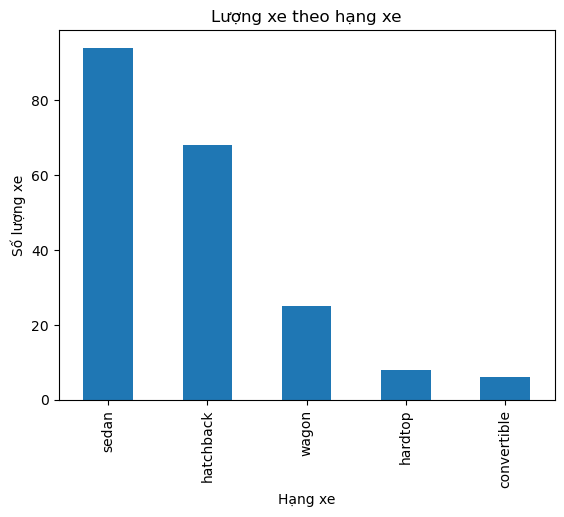

In [83]:
# Bi·ªÉu ƒë·ªì bar vertical
body_style_counts.plot.bar(xlabel='H·∫°ng xe', ylabel='S·ªë l∆∞·ª£ng xe', title="L∆∞·ª£ng xe theo h·∫°ng xe")

<Axes: title={'center': 'L∆∞·ª£ng xe theo h·∫°ng xe'}, xlabel='S·ªë l∆∞·ª£ng xe', ylabel='H·∫°ng xe'>

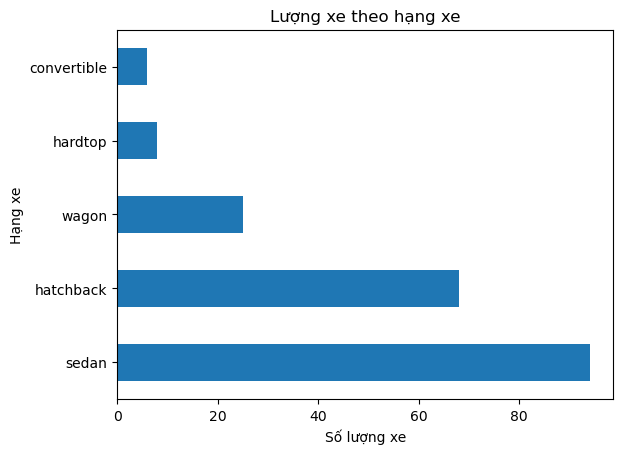

In [85]:
# Bi·ªÉu ƒë·ªì bar horizotal
body_style_counts.plot.barh(ylabel='H·∫°ng xe', xlabel='S·ªë l∆∞·ª£ng xe', title="L∆∞·ª£ng xe theo h·∫°ng xe")

S·∫£n ph·∫©m  Doanh thu 2023  Doanh thu 2024
0        A             100             120
1        B             150             180
2        C             200             210
3        D             130             160

<Axes: title={'center': 'So s√°nh doanh thu theo nƒÉm'}, xlabel='S·∫£n ph·∫©m'>

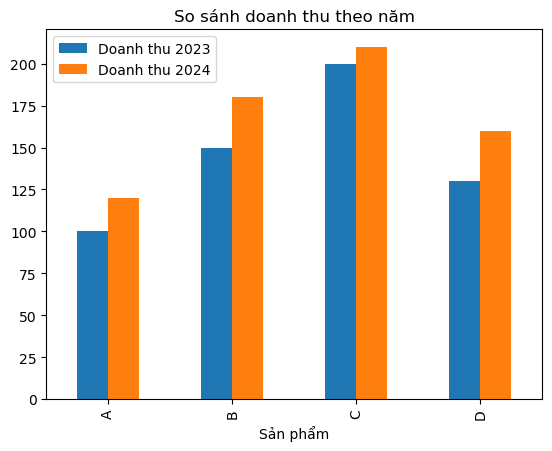

In [87]:
data = {'S·∫£n ph·∫©m': ['A', 'B', 'C', 'D'],
        'Doanh thu 2023': [100, 150, 200, 130],
        'Doanh thu 2024': [120, 180, 210, 160]}

df = pd.DataFrame(data)
display(df) 
# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt nh√≥m
df.plot.bar(x='S·∫£n ph·∫©m', title="So s√°nh doanh thu theo nƒÉm")


<Axes: title={'center': 'Doanh thu v·ªõi m√†u t√πy ch·ªânh'}, xlabel='S·∫£n ph·∫©m'>

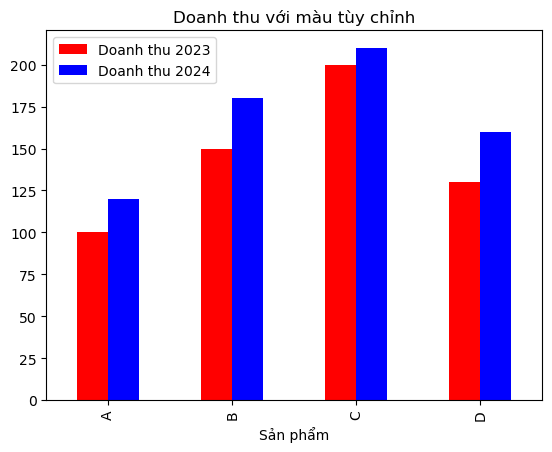

In [88]:
df.plot.bar(x='S·∫£n ph·∫©m', color=['red', 'blue'], title="Doanh thu v·ªõi m√†u t√πy ch·ªânh")  

<Axes: title={'center': 'Doanh thu theo nƒÉm (X·∫øp ch·ªìng)'}, xlabel='S·∫£n ph·∫©m'>

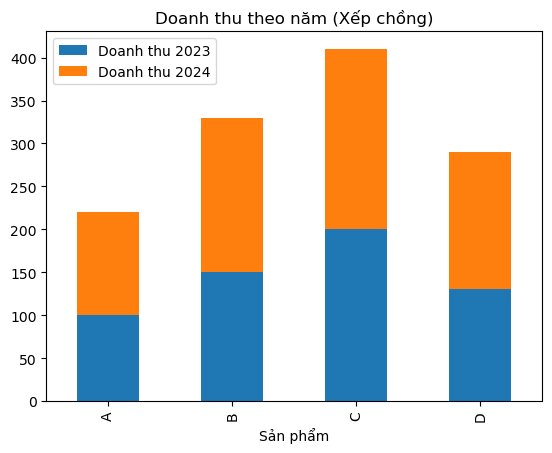

In [89]:
df.plot.bar(x='S·∫£n ph·∫©m', stacked=True, title="Doanh thu theo nƒÉm (X·∫øp ch·ªìng)")


In [90]:
mpg = cars.groupby('make', as_index=False)[['city-mpg', 'highway-mpg']].mean()
mpg.head() 

make   city-mpg  highway-mpg
0  alfa-romero  20.333333    26.666667
1         audi  19.333333    24.500000
2          bmw  19.375000    25.375000
3    chevrolet  41.000000    46.333333
4        dodge  28.000000    34.111111

In [91]:
mpg = mpg.sort_values('city-mpg').head(10)
mpg

make   city-mpg  highway-mpg
7          jaguar  14.333333    18.333333
15        porsche  17.500000    25.500000
9   mercedes-benz  18.500000    21.000000
10        mercury  19.000000    24.000000
1            audi  19.333333    24.500000
2             bmw  19.375000    25.375000
17           saab  20.333333    27.333333
0     alfa-romero  20.333333    26.666667
21          volvo  21.181818    25.818182
13         peugot  22.454545    26.636364

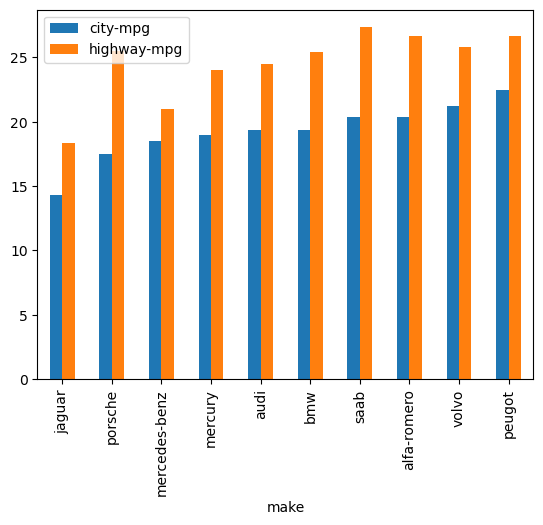

In [92]:
# top 10 h√£ng xe c√≥ city-mpg (m·ª©c ti√™u th·ª• nhi√™n li·ªáu trong th√†nh ph·ªë v√† cao t·ªëc) th·∫•p nh·∫•t

mpg.plot.bar(x = 'make');

#### Bi·ªÉu ƒë·ªì boxplot  
Bi·ªÉu ƒë·ªì Boxplot (hay c√≤n g·ªçi l√† box-and-whisker plot) l√† m·ªôt c√¥ng c·ª• tr·ª±c quan gi√∫p hi·ªÉn th·ªã ph√¢n b·ªë c·ªßa d·ªØ li·ªáu th√¥ng qua c√°c ch·ªâ s·ªë th·ªëng k√™ nh∆∞:  
* Median (trung v·ªã)  
* Quartiles (t·ª© ph√¢n v·ªã)  
* Whiskers (ph·∫°m vi d·ªØ li·ªáu kh√¥ng ph·∫£i ngo·∫°i l·ªá)  
* Outliers (c√°c ƒëi·ªÉm ngo·∫°i l·ªá)  


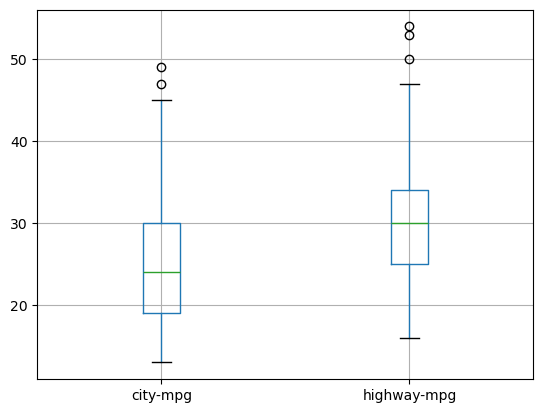

In [93]:
cars.boxplot(['city-mpg', 'highway-mpg']);

**Bi·ªÉu ƒë·ªì boxplot tr√™n minh h·ªça:**  

H·ªôp ch·ªØ nh·∫≠t (box) th·ªÉ hi·ªán kho·∫£ng gi√° gi·ªØa quartile 1 (Q1) v√† quartile 3 (Q3) ‚Äì t·ª©c l√† 50% d·ªØ li·ªáu gi·ªØa.  
ƒê∆∞·ªùng ngang trong h·ªôp l√† median (trung v·ªã) ‚Äì gi√° tr·ªã ch√≠nh gi·ªØa.  
"R√¢u" (whiskers) k√©o d√†i t·ª´ h·ªôp t·ªõi c√°c gi√° tr·ªã nh·ªè nh·∫•t v√† l·ªõn nh·∫•t n·∫±m trong kho·∫£ng h·ª£p l√Ω (c·ª• th·ªÉ l√† t·ª´ Q1 - 1.5√óIQR ƒë·∫øn Q3 + 1.5√óIQR).  
C√°c d·∫•u ch·∫•m ngo√†i r√¢u l√† outlier ‚Äì gi√° tr·ªã ngo·∫°i l·ªá n·∫±m ngo√†i kho·∫£ng n√†y.  

# üì¶ M·∫πo ƒë·ªçc nhanh Boxplot

| Th√†nh ph·∫ßn           | √ù nghƒ©a                                                                 |
|----------------------|-------------------------------------------------------------------------|
| Min (Gi√° tr·ªã nh·ªè nh·∫•t)| Gi√° tr·ªã nh·ªè nh·∫•t (trong kho·∫£ng h·ª£p l√Ω, kh√¥ng t√≠nh ngo·∫°i l·ªá)            |
| Q1 (Quartile 1)      | 25% s·ªë li·ªáu nh·ªè h∆°n gi√° tr·ªã n√†y                                         |
| Median (Q2)          | Trung v·ªã ‚Äì 50% s·ªë li·ªáu nh·ªè h∆°n, 50% l·ªõn h∆°n                             |
| Q3 (Quartile 3)      | 75% s·ªë li·ªáu nh·ªè h∆°n gi√° tr·ªã n√†y                                         |
| Max (Gi√° tr·ªã l·ªõn nh·∫•t)| Gi√° tr·ªã l·ªõn nh·∫•t (trong kho·∫£ng h·ª£p l√Ω, kh√¥ng t√≠nh ngo·∫°i l·ªá)           |
| IQR (Q3 - Q1)        | Kho·∫£ng t·ª© ph√¢n v·ªã ‚Äì ƒë·ªô ph√¢n t√°n d·ªØ li·ªáu trong 50% gi·ªØa                 |
| Whiskers (R√¢u)       | K√©o t·ª´ Q1 - 1.5√óIQR ƒë·∫øn Q3 + 1.5√óIQR ‚Äì gi·ªõi h·∫°n cho gi√° tr·ªã th∆∞·ªùng      |
| Outliers (Ngo·∫°i l·ªá)  | C√°c ƒëi·ªÉm n·∫±m ngo√†i kho·∫£ng whiskers ‚Äì th∆∞·ªùng l√† ƒëi·ªÉm b·∫•t th∆∞·ªùng         |

## üìå Ghi nh·ªõ nhanh
- üîπ **H·ªôp c√†ng d√†i ‚Üí d·ªØ li·ªáu ph√¢n t√°n nhi·ªÅu**
- üî∏ **Median l·ªách kh·ªèi trung t√¢m ‚Üí d·ªØ li·ªáu kh√¥ng ƒë·ªëi x·ª©ng**
- ‚ö†Ô∏è **Nhi·ªÅu outliers ‚Üí d·ªØ li·ªáu c√≥ nhi·ªÅu gi√° tr·ªã b·∫•t th∆∞·ªùng**
- ‚ÜïÔ∏è **Whiskers d√†i ‚Üí c√≥ th·ªÉ c√≥ ph·∫°m vi l·ªõn ho·∫∑c nhi·ªÅu bi·∫øn ƒë·ªông**

> ‚úÖ Boxplot r·∫•t t·ªët ƒë·ªÉ so s√°nh nhi·ªÅu nh√≥m d·ªØ li·ªáu c√πng l√∫c.


#### Bi·ªÉu ƒë·ªì Histogram  

Histogram l√† m·ªôt bi·ªÉu ƒë·ªì gi√∫p hi·ªÉn th·ªã ph√¢n b·ªë t·∫ßn su·∫•t c·ªßa d·ªØ li·ªáu s·ªë theo c√°c kho·∫£ng (bins). Kh√°c v·ªõi bi·ªÉu ƒë·ªì c·ªôt (bar chart), histogram kh√¥ng hi·ªÉn th·ªã t·ª´ng gi√° tr·ªã ri√™ng l·∫ª m√† nh√≥m ch√∫ng v√†o c√°c kho·∫£ng v√† ƒë·∫øm s·ªë l∆∞·ª£ng ph·∫ßn t·ª≠ trong m·ªói kho·∫£ng.  

Pandas h·ªó tr·ª£ v·∫Ω histogram tr·ª±c ti·∫øp b·∫±ng .plot(kind='hist') ho·∫∑c .plot.hist()


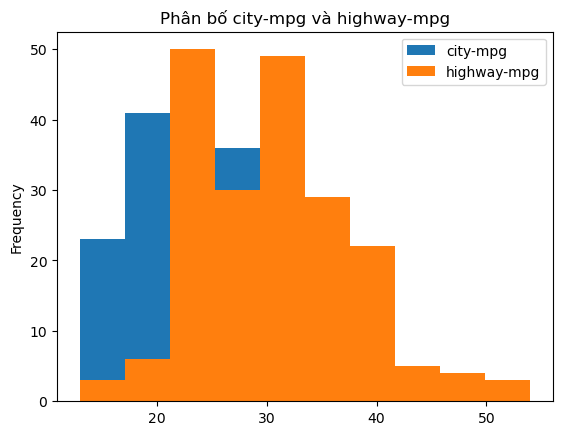

In [94]:
cars[['city-mpg', 'highway-mpg']].plot.hist(title="Ph√¢n b·ªë city-mpg v√† highway-mpg");

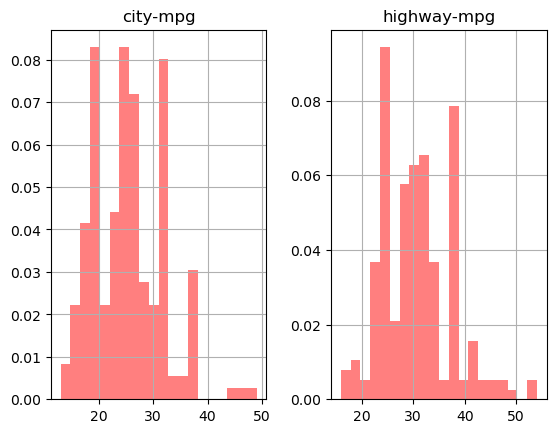

In [95]:
# cars[['city-mpg', 'highway-mpg']].hist(bins=20, alpha=0.5, density=True,orientation='horizontal',color='red'); # Ngang
cars[['city-mpg', 'highway-mpg']].hist(bins=20, alpha=0.5, density=True,color='red'); # ƒê·ª©ng
# alpha=0.5: L√†m trong su·ªët ƒë·ªÉ hi·ªÉn th·ªã c·∫£ hai nh√≥m.
# bins=20: Chia th√†nh 20 kho·∫£ng.
# hi·ªÉn th·ªã bi·ªÉu ƒë·ªì theo d·∫°ng t·ª∑ l·ªá ph·∫ßn trƒÉm thay v√¨ s·ªë l∆∞·ª£ng, s·ª≠ d·ª•ng density=True
# Xoay histogram theo chi·ªÅu ngang orientation='horizontal'
# Tu·ª≥ ch·ªânh m√†u s·∫Øc color='red'

### üìà Bi·ªÉu ƒë·ªì KDE (Kernel Density Estimation) trong SciPy  
KDE (Kernel Density Estimation) l√† m·ªôt ph∆∞∆°ng ph√°p ∆∞·ªõc l∆∞·ª£ng h√†m m·∫≠t ƒë·ªô x√°c su·∫•t c·ªßa m·ªôt t·∫≠p h·ª£p d·ªØ li·ªáu li√™n t·ª•c. N√≥ gi√∫p ta hi·ªÉu r√µ h∆°n v·ªÅ ph√¢n b·ªë c·ªßa d·ªØ li·ªáu thay v√¨ ch·ªâ d√πng histogram. 
Kh√°c v·ªõi histogram (c·ªôt r·ªùi r·∫°c), KDE hi·ªÉn th·ªã ƒë∆∞·ªùng cong m∆∞·ª£t m√† th·ªÉ hi·ªán s·ª± ph√¢n b·ªë c·ªßa d·ªØ li·ªáu.  
‚ö° ∆Øu ƒëi·ªÉm c·ªßa KDE:  
‚úÖ M∆∞·ª£t h∆°n histogram v√¨ kh√¥ng b·ªã ·∫£nh h∆∞·ªüng nhi·ªÅu b·ªüi s·ªë l∆∞·ª£ng bins.  
‚úÖ C√≥ th·ªÉ x√°c ƒë·ªãnh nhi·ªÅu ƒë·ªânh trong ph√¢n ph·ªëi (multimodal).  
‚úÖ D·ªÖ d√†ng so s√°nh nhi·ªÅu t·∫≠p d·ªØ li·ªáu tr√™n c√πng m·ªôt ƒë·ªì th·ªã.  
üìå Nh∆∞·ª£c ƒëi·ªÉm:  
‚ùå Ch·∫°y ch·∫≠m h∆°n histogram n·∫øu d·ªØ li·ªáu l·ªõn.  
‚ùå C·∫ßn ch·ªçn bandwidth (ƒë·ªô r·ªông nh√¢n) ph√π h·ª£p ƒë·ªÉ c√≥ ƒë·ªì th·ªã t·ªët.  

In [93]:
# C√†i ƒë·∫∑t th∆∞ vi·ªán scipy ƒë·ªÉ th·ª±c hi·ªán tr·ª±c quan h√≥a tr√™n bi·ªÉu ƒë·ªì kde plot
# !pip install scipy

<Axes: ylabel='Density'>

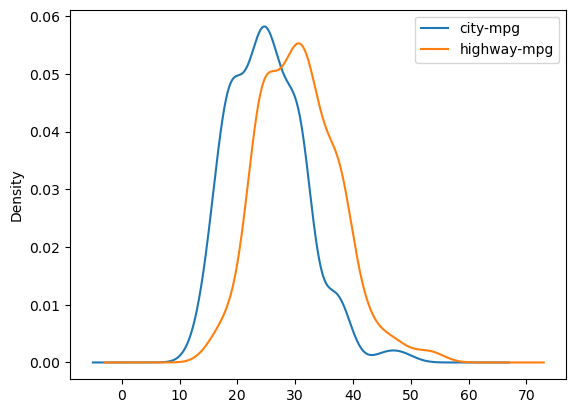

In [96]:
cars[['city-mpg', 'highway-mpg']].plot.kde()

#### Bi·ªÉu ƒë·ªì Scatter plot - Bi·ªÉu ƒë·ªì ph√¢n t√°n  
**1. Gi·ªõi thi·ªáu v·ªÅ Scatter Plot**
* Scatter Plot (bi·ªÉu ƒë·ªì ph√¢n t√°n) l√† m·ªôt lo·∫°i ƒë·ªì th·ªã d√πng ƒë·ªÉ hi·ªÉn th·ªã m·ªëi quan h·ªá gi·ªØa hai bi·∫øn s·ªë th√¥ng qua c√°c ƒëi·ªÉm d·ªØ li·ªáu.  
* M·ªói ƒëi·ªÉm tr√™n ƒë·ªì th·ªã bi·ªÉu di·ªÖn m·ªôt quan s√°t v·ªõi gi√° tr·ªã tr√™n tr·ª•c ho√†nh (X) v√† tr·ª•c tung (Y).  
* Bi·ªÉu ƒë·ªì n√†y gi√∫p ph√°t hi·ªán xu h∆∞·ªõng, t∆∞∆°ng quan v√† s·ª± ph√¢n b·ªë d·ªØ li·ªáu.  

**2. √ù nghƒ©a c·ªßa Scatter Plot**  
Scatter Plot h·ªØu √≠ch trong nhi·ªÅu tr∆∞·ªùng h·ª£p nh∆∞:  
‚úÖ X√°c ƒë·ªãnh m·ªëi quan h·ªá gi·ªØa hai bi·∫øn: C√≥ t∆∞∆°ng quan d∆∞∆°ng, t∆∞∆°ng quan √¢m hay kh√¥ng c√≥ t∆∞∆°ng quan.  
‚úÖ Ph√°t hi·ªán c√°c ƒëi·ªÉm b·∫•t th∆∞·ªùng (outliers) trong t·∫≠p d·ªØ li·ªáu.  
‚úÖ Quan s√°t xu h∆∞·ªõng t·ªïng th·ªÉ c·ªßa d·ªØ li·ªáu ƒë·ªÉ ƒë∆∞a ra d·ª± ƒëo√°n.  
‚úÖ So s√°nh c√°c nh√≥m d·ªØ li·ªáu kh√°c nhau tr√™n c√πng m·ªôt bi·ªÉu ƒë·ªì.  

**3. C√°c d·∫°ng t∆∞∆°ng quan trong Scatter Plot**  
üìä 1. T∆∞∆°ng quan d∆∞∆°ng (Positive Correlation)
Khi gi√° tr·ªã c·ªßa bi·∫øn X tƒÉng, bi·∫øn Y c≈©ng tƒÉng theo.

V√≠ d·ª•: S·ªë gi·ªù h·ªçc tƒÉng ‚Üí ƒêi·ªÉm s·ªë tƒÉng.

Bi·ªÉu ƒë·ªì c√≥ c√°c ƒëi·ªÉm t·∫°o th√†nh ƒë∆∞·ªùng ch√©o h∆∞·ªõng l√™n.

üìä 2. T∆∞∆°ng quan √¢m (Negative Correlation)
Khi gi√° tr·ªã c·ªßa bi·∫øn X tƒÉng, bi·∫øn Y gi·∫£m.

V√≠ d·ª•: S·ªë gi·ªù ch∆°i game tƒÉng ‚Üí ƒêi·ªÉm s·ªë gi·∫£m.

C√°c ƒëi·ªÉm t·∫°o th√†nh ƒë∆∞·ªùng ch√©o h∆∞·ªõng xu·ªëng.

üìä 3. Kh√¥ng c√≥ t∆∞∆°ng quan (No Correlation)
D·ªØ li·ªáu r·∫£i r√°c m√† kh√¥ng c√≥ xu h∆∞·ªõng r√µ r√†ng.

V√≠ d·ª•: Chi·ªÅu cao c·ªßa ng∆∞·ªùi kh√¥ng li√™n quan ƒë·∫øn s·ªë ƒëi·ªán tho·∫°i.

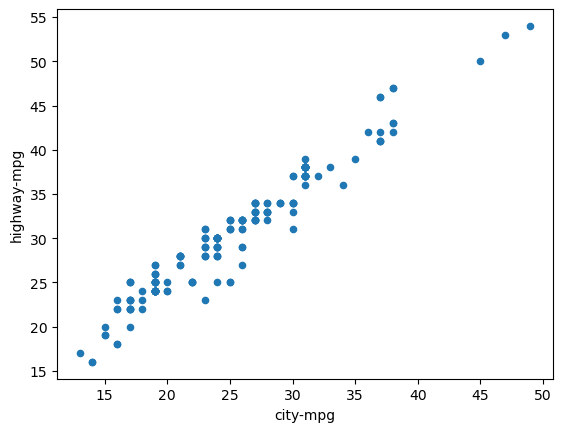

In [97]:
cars.plot.scatter(x = 'city-mpg', y = 'highway-mpg');

Gi·ªù h·ªçc  ƒêi·ªÉm s·ªë
0        2        4
1        3        5
2        5        7
3        6        7
4        8        8
5       10        9

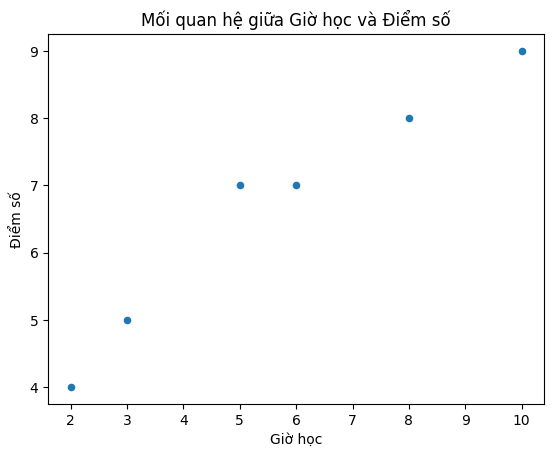

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# T·∫°o d·ªØ li·ªáu ng·∫´u nhi√™n
np.random.seed(42)
df = pd.DataFrame({
    'Gi·ªù h·ªçc': [2,3,5,6,8,10],
    'ƒêi·ªÉm s·ªë': [4,5,7,7,8,9]
})
display(df)
# V·∫Ω scatter plot
df.plot.scatter(x='Gi·ªù h·ªçc', y='ƒêi·ªÉm s·ªë', title="M·ªëi quan h·ªá gi·ªØa Gi·ªù h·ªçc v√† ƒêi·ªÉm s·ªë")
plt.show()

# üìå Gi·∫£i th√≠ch:
# x='Gi·ªù h·ªçc', y='ƒêi·ªÉm s·ªë': X√°c ƒë·ªãnh tr·ª•c ho√†nh v√† tr·ª•c tung.
# .plot.scatter(): H√†m v·∫Ω Scatter Plot trong Pandas.

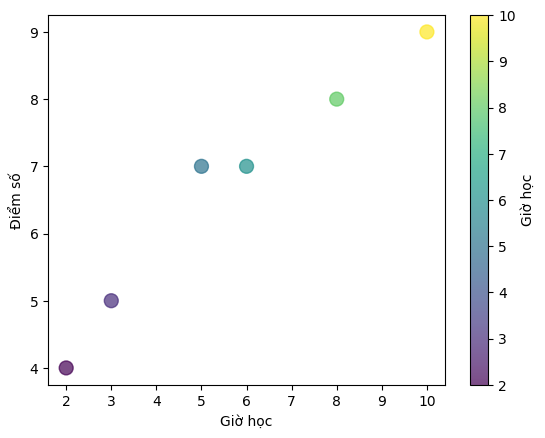

In [97]:
df.plot.scatter(x='Gi·ªù h·ªçc', y='ƒêi·ªÉm s·ªë', c='Gi·ªù h·ªçc', cmap='viridis', s=100, alpha=0.7)
plt.show()

# üìå T√πy ch·ªânh:
# c='Gi·ªù h·ªçc': M√†u s·∫Øc theo s·ªë gi·ªù h·ªçc.
# cmap='viridis': B·∫£ng m√†u.
# s=100: K√≠ch th∆∞·ªõc ƒëi·ªÉm d·ªØ li·ªáu.
# alpha=0.7: ƒê·ªô trong su·ªët c·ªßa ƒëi·ªÉm.
